# Final Project Submission
#### Business Problem: 

# Exploratory Data Analysis and Cleaning



#### Step 1: Import and read data

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
import xgboost as xgb
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScalerb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, plot_confusion_matrix, fbeta_score
from sklearn.pipeline import Pipeline

In [11]:
df_crashes = pd.read_csv('Crashes.csv')
df_cars= pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_ppl= pd.read_csv('Traffic_Crashes_-_People.csv')

/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [13]:
df_crashes.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,UNABLE TO DETERMINE,2158,N,MARMORA AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2020 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,1632,E,67TH ST,331.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,07/11/2020 08:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,110,E,51ST ST,224.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/08/2020 02:15:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,412,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [14]:
df_cars.head()

,crash_unit_id,crash_record_id,rd_no,crash_date,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,IL,2010.0,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,IL,2008.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_ppl.head()

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


#### Mergeing our datasets 

In [16]:
m1 = pd.merge(df_cars, df_ppl, how='left', on=['crash_record_id'])
m1.head()

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,IL,2010.0,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,IL,2008.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Na

In [17]:
m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])
m2.head()

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825)
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",09/28/2019 06:13:00 AM,

In [18]:
df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df.head()

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825)
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",09/28/2019 06:13:00 AM,

#### Create a few dataframes to explore differences between severe and not severe injuries

In [19]:
df_not_severe = df_ppl[(df_ppl['injury_classification'] != "INCAPACITATING INJURY") & (df_ppl['injury_classification'] != "FATAL")]
df_not_severe.head()

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [20]:
df_severe = df_ppl[(df_ppl['injury_classification'] == "INCAPACITATING INJURY") | (df_ppl['injury_classification'] == "FATAL")]
df_severe.head()

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
102,P193979,PASSENGER,883894fdf3e34b8da6aec050ca860213fc5f6657714684...,JD161663,804986.0,02/23/2020 12:40:00 AM,4.0,CHICAGO,IL,60649,M,27.0,NaN,NaN,SAFETY BELT NOT USED,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,NORTH WESTERN HOSPITAL,CFD AMB 43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,O880468,DRIVER,b25489278fb5b3ff0c61c1cdfd93028308c8879639caa6...,JD226210,835319.0,05/07/2020 05:21:00 AM,NaN,CHICAGO,IL,60630,M,39.0,IL,BM,DOT COMPLIANT MOTORCYCLE HELMET,NOT APPLICABLE,NONE,INCAPACITATING INJURY,STROGER,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
172,O837935,DRIVER,a8405fd5fb5ec1a8b80143f139e248d72c9bb630278936...,JD144213,795192.0,02/08/2020 03:02:00 AM,NaN,SKOKIE,IL,60076,M,62.0,IL,D,NONE PRESENT,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,ST.FRANSIC,56,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
308,O838234,PEDESTRIAN,d14abcac0d5211556093b27f866291121caa2f50c6b71b...,JD144622,NaN,02/08/2020 01:25:00 PM,NaN,CHICAGO,IL,NaN,M,28.0,NaN,NaN,NaN,NaN,NaN,INCAPACITATING INJURY,COMER CHILDREN'S HOSPITAL,CFD,NaN,NONE,UNKNOWN,UNKNOWN,CROSSING - NO CONTROLS (NOT AT INTERSECTION),NO CONTRASTING CLOTHING,UNKNOWN/NA,TEST NOT OFFERED,NaN,NaN
504,O838563,DRIVER,362c12430744ace0e1bd90e95689790166481ef62c096f...,JD145123,795783.0,02/08/2020 09:47:00 PM,NaN,CHICAGO,IL,60639,F,40.0,IL,NaN,USAGE UNKNOWN,"DEPLOYED, COMBINATION",UNKNOWN,FATAL,MT. SINAI,CFD,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


### Create our target variable called injury 

In [21]:
df['injury'] = df['injuries_total'] >=1
df['injury']= df['injury'].astype(int)

<ipython-input-21-62f74f6e576e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury'] = df['injuries_total'] >=1
<ipython-input-21-62f74f6e576e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury']= df['injury'].astype(int)


#### Create new columns 

In [22]:
df['fatality'] = df['injuries_fatal'] >=1
df['fatality'] = df['fatality'].astype(int)

<ipython-input-22-bebda9bafd3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['injuries_fatal'] >=1
<ipython-input-22-bebda9bafd3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['fatality'].astype(int)


In [23]:
df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

In [24]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df['rush_hour'] = (df['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))
df['rush_hour'].value_counts()
df

<ipython-input-24-5e9b851cc877>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour'] = (df['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))


,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,injury,fatality,rush_hour
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),0,0,0
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER

In [25]:
def road_defect(status):
    if status == 'NO DEFECTS':
        return 0
    else:
        return 1
df['road_defect'] = df['road_defect'].apply(road_defect)
df['road_defect'].value_counts()

<ipython-input-25-ebb50c5937bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['road_defect'] = df['road_defect'].apply(road_defect)


0    448327
1     92806
Name: road_defect, dtype: int64

In [26]:
df = df.drop('crash_day_of_week', axis=1)

In [27]:
df = df[df.road_defect != 'UNKNOWN']

In [28]:
df_18 = (df[df['crash_date'] < '2018-12-31 12:59:59'])
df_19 = (df[df['crash_date'] >= '2019-01-01 00:00:00'])

In [29]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'fatality', 'crash_hour', 
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause', 'first_crash_type', 'rush_hour'] 

In [30]:
df[columns]

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,rush_hour
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,0,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,0,CLEAR,NONE,NaN,UNABLE TO DETERMINE,OTHER NONCOLLISION,0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,0,3,LARAMIE AVE,"OVER $1,500",Y,WET,0,RAIN,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,0,22,87TH ST,$500 OR LESS,Y,DRY,0,CLEAR,NONE,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION,0
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,0,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,0,UNKNOWN,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,0
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,0,CLEAR,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532081,7c634a3d328d1c64c1fdef00de6c7c43986ebc72a6b6eb...,08/27/2021 03:00:00 PM,41.894324,-87.615120,0,8,0,15,LAKE SHORE DR NB,$500 OR LESS,Y,DRY,0,CLEAR,FAILED TO YIELD,NaN,FAILING TO YIELD RIGHT-OF-WAY,ANGLE,1
2532085,73f9ba74d84daea560594953f7732d2d88d14fcca39315...,08/27/2021 11:30:00 PM,41.931741,-87.722146,0,8,0,23,DIVERSEY AVE,"OVER $1,500",Y,DRY,0,CLEAR,NaN,NaN,NOT APPLICABLE,REAR END,0
2532091,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,0,15,LAKE ST,"OVER $1,500",Y,DRY,0,CLEAR,UNKNOWN,NaN,UNABLE TO DETERMINE,ANGLE,1
2532111,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,0,8,79TH ST,$500 OR LESS,NaN,DRY,1,CLEAR,UNKNOWN,NaN,UNABLE TO DETERMINE,ANIMAL,1


In [31]:
df_imp = df[columns]

In [32]:
df = df_imp

In [33]:
df_injuries = df_imp.loc[df_imp['injury'] == 1]

In [34]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Reckless/Poor Driving',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Reckless/Poor Driving',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Outside World/Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Outside World/Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Outside World/Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Outside World/Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Outside World/Out of Driver's Control",
              'ANIMAL':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Outside World/Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Outside World/Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

In [35]:
df['Simple_Reason'] = df['prim_contributory_cause'].map(cause_dict)

In [36]:
df = pd.get_dummies(df,columns=['Simple_Reason', 'weather_condition', 'first_crash_type'])

In [37]:
df = df.drop(labels = ['crash_record_id','crash_date_x','latitude','longitude', 'fatality', 'street_name',
                       'damage','exceed_speed_limit_i', 'prim_contributory_cause', 'hit_and_run_i', 'crash_hour',
                        'crash_month', 'roadway_surface_cond', 'Simple_Reason_Other/Unknown', 'weather_condition_UNKNOWN', 
                       'weather_condition_OTHER', 'driver_action', 'first_crash_type_OTHER NONCOLLISION'], axis=1)

In [38]:
df

,injury,road_defect,rush_hour,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related,"weather_condition_BLOWING SAND, SOIL, DIRT",weather_condition_BLOWING SNOW,weather_condition_CLEAR,weather_condition_CLOUDY/OVERCAST,weather_condition_FOG/SMOKE/HAZE,weather_condition_FREEZING RAIN/DRIZZLE,weather_condition_RAIN,weather_condition_SEVERE CROSS WIND GATE,weather_condition_SLEET/HAIL,weather_condition_SNOW,first_crash_type_ANGLE,first_crash_type_ANIMAL,first_crash_type_FIXED OBJECT,first_crash_type_HEAD ON,first_crash_type_OTHER OBJECT,first_crash_type_OVERTURNED,first_crash_type_PARKED MOTOR VEHICLE,first_crash_type_PEDALCYCLIST,first_crash_type_PEDESTRIAN,first_crash_type_REAR END,first_crash_type_REAR TO FRONT,first_crash_type_REAR TO REAR,first_crash_type_REAR TO SIDE,first_crash_type_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_SIDESWIPE SAME DIRECTION,first_crash_type_TRAIN,first_crash_type_TURNING
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532081,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2532085,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2532091,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2532111,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Defining X & Y and Train-Test Split

In [39]:
X= df.drop('injury', axis=1)
y= df['injury']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Models

- One First Simple Model (DummyClassifier) 
- Then, we used Scaled and used SMOTE to deal with our class imbalance

##### Three Iterations from simple to complex of each of the following models 
- Logistical Regression
- Random Forest 
- K Nearest Neighbor
- Decision Tree
- Gaussian Naive Bayes
- XGBoost 



#### First Simple Model

In [41]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

baseline_cv = cross_val_score(dummy_clf, X_train, y_train, scoring="neg_root_mean_squared_error")


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", -(baseline_cv.mean()))

Accuracy: 0.8695706809378788
Precision: 0.0
Recall: 0.0
F1: 0.0
FBeta 0.0
AUC 0.5
CVS 0.36266616894756865


/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Standardization, SMOTE, and Confusion Matrix

In [42]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

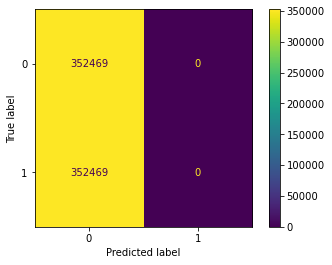

In [43]:
plot_confusion_matrix(dummy_clf, X_train, y_train)

#### Log Regression #1

In [44]:
logreg = LogisticRegression(random_state=42)

grid_values = {'penalty': ['l1', 'l2'],'C':[.0001,.001,.01,.1,1]}

grid = GridSearchCV(logreg, param_grid = grid_values)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

baseline_cv = cross_val_score(grid, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("CVS:", -(baseline_cv.mean()))

/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Accuracy: 0.730500280890571
Precision: 0.2733799084557938
Recall: 0.6431283649759139
F1: 0.3836700194404531
FBeta: 0.3088983858235566
CVS: 0.5578223322832885


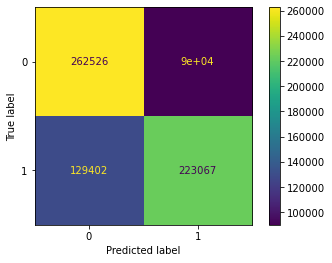

In [46]:
plot_confusion_matrix(grid, X_train, y_train)

#### Log Regression #2

In [ ]:
logreg = LogisticRegression(random_state=42)

grid_values = {'penalty': ['l1', 'l2'],'C':[.0001,.001,.01,.1,1], max_iter=['200'] }

grid = GridSearchCV(logreg, param_grid = grid_values)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

baseline_cv = cross_val_score(grid, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Log Regression #3

In [ ]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

baseline_cv = cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Random Forest #1

In [ ]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Random Forest #2

In [ ]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Random Forest #3

In [ ]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### KNN Regression #1

In [ ]:
neigh = KNeighborsClassifier()

neigh.fit(X, y)

y_pred = neigh.predict(X_test)

baseline_cv = cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### KNN Regression #2

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X, y)

y_pred = neigh.predict(X_test)

baseline_cv = cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error")


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### KNN Regression #3

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X, y)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Decision Tree #1

In [ ]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, y)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Decision Tree #2

In [ ]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, y)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Decision Tree #3

In [ ]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, y)

y_pred = rand.predict(X_test)

baseline_cv = cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Gaussian Naive Bayes #1

In [ ]:
gnb = GaussianNB()

gnb = gnb.fit(X_train, y_train)

y_pred = predict(X_test)

baseline_cv = cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Gaussian Naive Bayes #2

In [ ]:
gnb = GaussianNB()

gnb = gnb.fit(X_train, y_train)

y_pred = predict(X_test)

baseline_cv = cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### Gaussian Naive Bayes #3

In [ ]:
gnb = GaussianNB()

gnb = gnb.fit(X_train, y_train)

y_pred = predict(X_test)

baseline_cv = cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### XGBoost #1

In [ ]:
xgboost = xgb.XGBClassifier(random_state=42)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

baseline_cv = cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### XGBoost #2

In [ ]:
xgb= xgboost.XGBClassifier(random_state=42)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

baseline_cv = cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

#### XGBoost #3

In [ ]:
xgboost= xgboost.XGBClassifier(random_state=42)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

baseline_cv = cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("FBeta:", fbeta_score(y_test, y_pred, beta=0.5))
print("AUC:", roc_auc_score(y_test, y_pred))
print("CVS:", -(baseline_cv.mean()))

# Visualizations

In [ ]:
count = df.groupby('street_name')['injury'].sum()

In [ ]:
fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap =True)
hue = df['street_name'].apply(lambda x: count[x])
points = ax.scatter(df['longitude'], df['latitude'], c=hue, s=20,
                   cmap = 'YlGnBu')

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Amounts of Severe Accidents by Street');